In [87]:
# Imports
import tweepy
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

import csv
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [60]:
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

# Print all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
IS_LOCAL = True

import os

from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec
from gensim.test.utils import get_tmpfile
from gensim.models import KeyedVectors


from time import time 
from collections import defaultdict

import plotly
import plotly.express as px
import plotly.graph_objs as go
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode, plot
cf.go_offline()

In [4]:
# Auth keys -  create twitter developer account to get auth keys

consumer_key = 
consumer_secret = 
access_token = 
access_token_secret = 
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [56]:
# get username and tweet id - where the takealot black friday hashtag is
name = 'bellz_motshwane'
tweet_id = '1456179071646306306'

replies=[]
for tweet in tweepy.Cursor(api.search_tweets,q='to:'+name, result_type='recent', timeout=999999).items(1000):
    if hasattr(tweet, 'in_reply_to_status_id_str'):
        if (tweet.in_reply_to_status_id_str==tweet_id):
            replies.append(tweet)

with open('replies_clean.csv', 'w',encoding='utf-8') as f:
    csv_writer = csv.DictWriter(f, fieldnames=('user', 'text'))
    csv_writer.writeheader()
    for tweet in replies:
        row = {'user': tweet.user.screen_name, 'text': tweet.text.replace('\n', ' ')}
        csv_writer.writerow(row)

Unexpected parameter: timeout
Unexpected parameter: timeout
Unexpected parameter: timeout
Unexpected parameter: timeout
Unexpected parameter: timeout
Unexpected parameter: timeout
Unexpected parameter: timeout
Unexpected parameter: timeout
Unexpected parameter: timeout


In [113]:
df.head()

,text,frequency
0,Airfryer,7
1,washing machine,6
2,sound bar,6
3,fryer,5
4,TV,5


In [61]:
df['text'] = df.text.str.replace('@bellz_motshwane', '')

In [64]:
df.shape

(51, 2)

In [65]:
import re

# Define a function to clean the text
def clean(text):
    # Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned_Text'] = df['text'].apply(clean)
df.head()

,user,text,Cleaned_Text
0,Miss_massG,A tv 🤧,A tv
1,molosiwaf,Dishwasher &amp; automatic laundry machine. o...,Dishwasher amp automatic laundry machine ooh ...
2,K_Tseka,A 65' plasma,A plasma
3,FaithG007,Smart TV and Instant pot + air fryer!! 🙆🏽‍♀️,Smart TV and Instant pot air fryer
4,bridgitkare,"Camera,phone and skin care",Camera phone and skin care


In [66]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

df['POS_tagged'] = df['Cleaned_Text'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mncedisi.mncwabe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mncedisi.mncwabe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mncedisi.mncwabe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,user,text,Cleaned_Text,POS_tagged
0,Miss_massG,A tv 🤧,A tv,"[(tv, n)]"
1,molosiwaf,Dishwasher &amp; automatic laundry machine. o...,Dishwasher amp automatic laundry machine ooh ...,"[(Dishwasher, n), (amp, v), (automatic, a), (l..."
2,K_Tseka,A 65' plasma,A plasma,"[(plasma, n)]"
3,FaithG007,Smart TV and Instant pot + air fryer!! 🙆🏽‍♀️,Smart TV and Instant pot air fryer,"[(Smart, n), (TV, n), (Instant, n), (pot, n), ..."
4,bridgitkare,"Camera,phone and skin care",Camera phone and skin care,"[(Camera, n), (phone, n), (skin, n), (care, n)]"


In [67]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos: 
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:  
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew
    
df['Lemma'] = df['POS_tagged'].apply(lemmatize)
df.head()

,user,text,Cleaned_Text,POS_tagged,Lemma
0,Miss_massG,A tv 🤧,A tv,"[(tv, n)]",tv
1,molosiwaf,Dishwasher &amp; automatic laundry machine. o...,Dishwasher amp automatic laundry machine ooh ...,"[(Dishwasher, n), (amp, v), (automatic, a), (l...",Dishwasher amp automatic laundry machine ooh...
2,K_Tseka,A 65' plasma,A plasma,"[(plasma, n)]",plasma
3,FaithG007,Smart TV and Instant pot + air fryer!! 🙆🏽‍♀️,Smart TV and Instant pot air fryer,"[(Smart, n), (TV, n), (Instant, n), (pot, n), ...",Smart TV Instant pot air fryer
4,bridgitkare,"Camera,phone and skin care",Camera phone and skin care,"[(Camera, n), (phone, n), (skin, n), (care, n)]",Camera phone skin care


In [83]:
Counter(" ".join(df["Lemma"]).split()).most_common(100)

[('machine', 6),
 ('air', 5),
 ('fryer', 5),
 ('new', 5),
 ('TV', 4),
 ('bar', 4),
 ('amp', 3),
 ('phone', 3),
 ('Smart', 2),
 ('Camera', 2),
 ('Tv', 2),
 ('sale', 2),
 ('small', 2),
 ('washing', 2),
 ('Airfryer', 2),
 ('http', 2),
 ('co', 2),
 ('Fridge', 2),
 ('External', 2),
 ('drive', 2),
 ('sound', 2),
 ('want', 2),
 ('tv', 1),
 ('Dishwasher', 1),
 ('automatic', 1),
 ('laundry', 1),
 ('ooh', 1),
 ('plasma', 1),
 ('Instant', 1),
 ('pot', 1),
 ('skin', 1),
 ('care', 1),
 ('laptop', 1),
 ('Wish', 1),
 ('find', 1),
 ('peace', 1),
 ('mind', 1),
 ('girl', 1),
 ('tire', 1),
 ('couch', 1),
 ('television', 1),
 ('set', 1),
 ('Gas', 1),
 ('braai', 1),
 ('stand', 1),
 ('weighted', 1),
 ('blanket', 1),
 ('apparently', 1),
 ('improve', 1),
 ('sleep', 1),
 ('count', 1),
 ('day', 1),
 ('Also', 1),
 ('seriously', 1),
 ('consider', 1),
 ('UPS', 1),
 ('AirPods', 1),
 ('vacuum', 1),
 ('clean', 1),
 ('Ice', 1),
 ('cream', 1),
 ('maker', 1),
 ('swim', 1),
 ('pool', 1),
 ('stuff', 1),
 ('CoriumSkincare'

In [80]:
#convert the list above to dataframe
data = Counter(" ".join(df["Lemma"]).split()).most_common(100)

In [81]:
data = pd.DataFrame(data,columns = ['text','frequency'])

In [82]:
data.head()

,text,frequency
0,machine,6
1,air,5
2,fryer,5
3,new,5
4,TV,4


In [106]:
data.to_csv('tweet_data.csv')

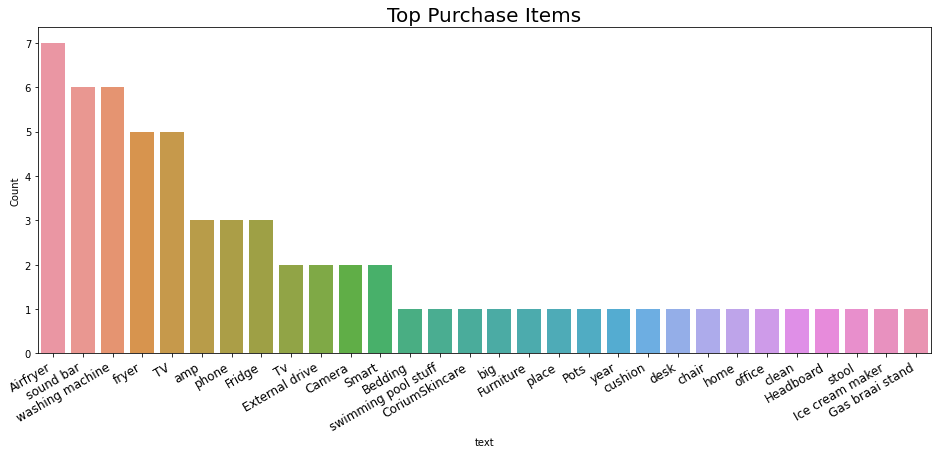

In [109]:

top_purchase_items = tweet_data.sort_values(by='frequency',ascending=False)[:30]



plt.figure(figsize=(16,6))
sns.barplot(x='text', y='frequency', data=top_purchase_items)
plt.title('Top Purchase Items', fontsize=20)
plt.ylabel('Count')
plt.ticklabel_format(style='plain', axis='y'); # set scientific notation off
plt.xticks(rotation=30, ha='right',fontsize=12)
plt.show()

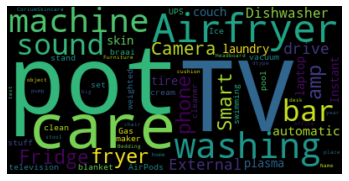

In [111]:
# word cloud to generate most occuring word
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = tweet_data.text

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(str(text))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()